# Quation 1

In machine learning algorithms, particularly in Support Vector Machines (SVMs), the relationship between a polynomial function and a kernel function lies in how the kernel function implicitly captures the non-linear relationships in the data without explicitly transforming the features.

A polynomial function is a type of mathematical function that involves powers of a variable raised to non-negative integer exponents. In the context of SVM, a polynomial kernel is a specific type of kernel function that computes the dot product of transformed feature vectors without explicitly calculating the transformation.

# Quation 2

using scikit learn library 

from sklearn.svm import SVC

clf=SVC(kernel='polynomial')

# Quation 3

In Support Vector Regression (SVR), epsilon (ε) is a parameter that defines the width of the epsilon-insensitive tube. The epsilon-insensitive tube is a range around the predicted values where errors are ignored, and the model is considered accurate. The tube's width is determined by the epsilon parameter.

Increasing the value of epsilon in SVR generally leads to an increase in the number of support vectors. The reason for this lies in the trade-off between model complexity and the width of the tube.

Here's the intuition:

Smaller Epsilon:
A smaller epsilon creates a narrow epsilon-insensitive tube, meaning the model is less tolerant to errors.
This can result in a more complex model that tries to fit the training data precisely, potentially leading to fewer support vectors.

Larger Epsilon:
A larger epsilon creates a wider epsilon-insensitive tube, allowing for more errors within this range without affecting the model's
performance.
a more relaxed model may have a larger margin accepting more points within the tube as support vector.



# Quation 4

kernel Function :
                Role: the kernel function determine the type of transformation applied to the input feature common kernel
                      include linear,polynomial,and radial basis function
                impact: the choice of the kernel affects the model ability to capture non linear patterns in the data.
                example: use an RBF kernel for complex, non linear relationship choes a linear kernel for linear relationship.
                
C Parameter:
            Role: the regularization parameter c controls the trade off between fitting the training data and having a smooth decision boundry
            impact: smaller c result in a smmother decision boundry with more training error allowed, while larger c value make the decision boundry 
            closly fit the training data

Epsilon Parameter (ε):
                    Role: Epsilon defines the width of the epsilon-insensitive tube, where errors are tolerated.
                    Impact: Smaller ε values make the model less tolerant to errors, leading to a potentially more complex model; larger ε values
                    create a wider margin and a more relaxed model.
                    Example: Use a smaller ε for precise fitting to training data; use a larger ε for a more flexible model.

Gamma Parameter:
                Role: Gamma controls the influence of a single training point, affecting the shape of the decision boundary. It is crucial for RBF
                kernel.
                Impact: Smaller gamma values result in a broader influence, while larger gamma values make the decision boundary more focused on 
                individual points.
                Example: Use a smaller gamma for smoother decision boundaries; use a larger gamma for more intricate decision boundaries, especially 
                with RBF kernel.


# Quation 5 Assignment

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Indian Liver Patient Dataset (ILPD).csv')
df.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
df.isnull().sum()

Age          0
Gender       0
TB           0
DB           0
Alkphos      0
Sgpt         0
Sgot         0
TP           0
ALB          0
A/G Ratio    4
Selector     0
dtype: int64

In [4]:
df.dropna(inplace=True)
df.isnull().sum()

Age          0
Gender       0
TB           0
DB           0
Alkphos      0
Sgpt         0
Sgot         0
TP           0
ALB          0
A/G Ratio    0
Selector     0
dtype: int64

In [5]:
df[df.duplicated()]

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
19,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
26,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
34,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
55,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
62,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1
106,36,Male,5.3,2.3,145,32,92,5.1,2.6,1.00,2
108,36,Male,0.8,0.2,158,29,39,6.0,2.2,0.50,2
138,18,Male,0.8,0.2,282,72,140,5.5,2.5,0.80,1
143,30,Male,1.6,0.4,332,84,139,5.6,2.7,0.90,1
158,72,Male,0.7,0.1,196,20,35,5.8,2.0,0.50,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 582
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        579 non-null    int64  
 1   Gender     579 non-null    object 
 2   TB         579 non-null    float64
 3   DB         579 non-null    float64
 4   Alkphos    579 non-null    int64  
 5   Sgpt       579 non-null    int64  
 6   Sgot       579 non-null    int64  
 7   TP         579 non-null    float64
 8   ALB        579 non-null    float64
 9   A/G Ratio  579 non-null    float64
 10  Selector   579 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 54.3+ KB


In [7]:
df.columns

Index(['Age', 'Gender', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB',
       'A/G Ratio', 'Selector'],
      dtype='object')

In [8]:
df.shape

(579, 11)

In [9]:
df.describe()

,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,44.782383,3.315371,1.494128,291.366149,81.126079,110.414508,6.481693,3.138515,0.947064,1.284974
std,16.221786,6.227716,2.816499,243.561863,183.182845,289.850034,1.084641,0.794435,0.319592,0.451792
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,61.000000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


/tmp/ipykernel_841/4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

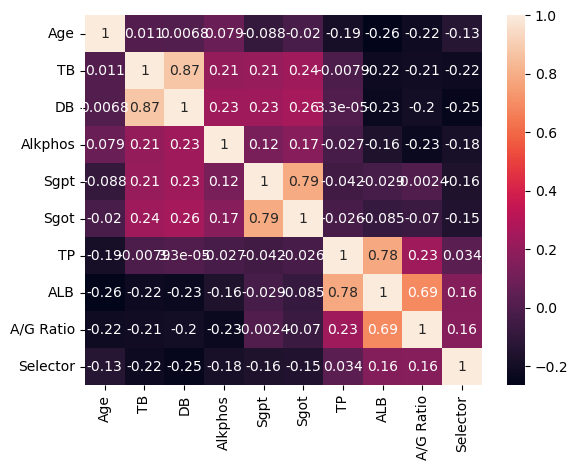

In [10]:
sns.heatmap(df.corr(),annot=True)

In [11]:
df['Gender']=df['Gender'].replace({'Male':0,'Female':1})

In [12]:
df.dtypes

Age            int64
Gender         int64
TB           float64
DB           float64
Alkphos        int64
Sgpt           int64
Sgot           int64
TP           float64
ALB          float64
A/G Ratio    float64
Selector       int64
dtype: object

In [13]:
df.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [14]:
x=df.drop('Selector',axis=True) # dependent variable
y=df['Selector'] #independent variable

In [15]:
from sklearn.model_selection import train_test_split


In [16]:
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=36)

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((434, 10), (145, 10), (434,), (145,))

In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [19]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [20]:
X_train

array([[ 1.48003582,  1.7926495 , -0.4494595 , ...,  1.76174485,
         2.23350226,  1.35337457],
       [-2.58617089, -0.55783353, -0.43170045, ...,  1.39967677,
         1.1094126 ,  0.16208654],
       [-0.45923199, -0.55783353, -0.32514614, ..., -0.41066362,
        -0.1395759 ,  0.16208654],
       ...,
       [ 1.79282095,  1.7926495 , -0.43170045, ...,  1.30915975,
         1.1094126 ,  0.16208654],
       [ 1.22980772, -0.55783353, -0.39618234, ...,  0.49450658,
         0.98451375,  0.75773055],
       [ 0.91702258, -0.55783353,  1.45075902, ..., -0.22962958,
        -0.38937361, -0.43355748]])

In [21]:
from sklearn.svm import SVC
clf=SVC()

In [22]:
clf.fit(X_train,y_train)

SVC()

In [23]:
y_pred=clf.predict(X_test)

In [24]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix


In [25]:
print('accuracy is: ',accuracy_score(y_test,y_pred))

accuracy is:  0.7448275862068966


In [26]:
print('confusion matrix is: ',confusion_matrix(y_test,y_pred))
print('classification report is: ',classification_report(y_test,y_pred))

confusion matrix is:  [[108   0]
 [ 37   0]]
classification report is:                precision    recall  f1-score   support

           1       0.74      1.00      0.85       108
           2       0.00      0.00      0.00        37

    accuracy                           0.74       145
   macro avg       0.37      0.50      0.43       145
weighted avg       0.55      0.74      0.64       145



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
from sklearn.model_selection import GridSearchCV
parameters={'kernel':['poly','rbf','sigmoid','linear'],
           'C':[1,2,3],
           'gamma':['scale','auto']}


In [31]:
grid=GridSearchCV(clf,param_grid=parameters,scoring='accuracy',verbose=3,cv=5)

In [32]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END .....C=1, gamma=scale, kernel=poly;, score=0.678 total time=   0.0s
[CV 2/5] END .....C=1, gamma=scale, kernel=poly;, score=0.667 total time=   0.0s
[CV 3/5] END .....C=1, gamma=scale, kernel=poly;, score=0.655 total time=   0.0s
[CV 4/5] END .....C=1, gamma=scale, kernel=poly;, score=0.701 total time=   0.0s
[CV 5/5] END .....C=1, gamma=scale, kernel=poly;, score=0.698 total time=   0.0s
[CV 1/5] END ......C=1, gamma=scale, kernel=rbf;, score=0.701 total time=   0.0s
[CV 2/5] END ......C=1, gamma=scale, kernel=rbf;, score=0.701 total time=   0.0s
[CV 3/5] END ......C=1, gamma=scale, kernel=rbf;, score=0.701 total time=   0.0s
[CV 4/5] END ......C=1, gamma=scale, kernel=rbf;, score=0.713 total time=   0.0s
[CV 5/5] END ......C=1, gamma=scale, kernel=rbf;, score=0.709 total time=   0.0s
[CV 1/5] END ..C=1, gamma=scale, kernel=sigmoid;, score=0.713 total time=   0.0s
[CV 2/5] END ..C=1, gamma=scale, kernel=sigmoid

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 2, 3], 'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'rbf', 'sigmoid', 'linear']},
             scoring='accuracy', verbose=3)

In [33]:
grid.best_params_

{'C': 2, 'gamma': 'auto', 'kernel': 'sigmoid'}

In [34]:
y_predi=grid.predict(X_test)

In [35]:
print('accuracy is: ',accuracy_score(y_test,y_predi))
print('confusion matrix is: ',confusion_matrix(y_test,y_predi))
print('classification report is: ',classification_report(y_test,y_predi))

accuracy is:  0.6896551724137931
confusion matrix is:  [[94 14]
 [31  6]]
classification report is:                precision    recall  f1-score   support

           1       0.75      0.87      0.81       108
           2       0.30      0.16      0.21        37

    accuracy                           0.69       145
   macro avg       0.53      0.52      0.51       145
weighted avg       0.64      0.69      0.65       145

